In [1]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from source.HelperFunctions import find_root_directory

In [4]:
root = find_root_directory()
log_file = root / "results" / "logs" / "testset_v2_euc_new.log"

In [5]:
with open(log_file) as f:
    f = f.readlines()

In [6]:
sim = []
label = []

for line in f:
    if "similarity measure" in line:
        info = line.split(": ")[1]
        sim.append(info.split(".")[0] +"."+ info.split(".")[1][0:2])
    elif "Real / True" in line:
        if "Q" in line.split(": ")[1]:
            label.append(True)
        elif "null" in line.split(": ")[1]:
            label.append(False)

In [7]:
assert len(sim) == len(label)

In [8]:
data_dict = {"sim_measure":sim, "in_Wikidata":label}
df = pd.DataFrame(data_dict)

In [9]:
df = df.astype({"sim_measure":float, "in_Wikidata":bool})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sim_measure  110 non-null    float64
 1   in_Wikidata  110 non-null    bool   
dtypes: bool(1), float64(1)
memory usage: 1.1 KB


c:\Users\lujae\Documents\university\DataScience\courses-semester_3\Practical_lab\Code\kg-lab-ws23-task3\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lujae\Documents\university\DataScience\courses-semester_3\Practical_lab\Code\kg-lab-ws23-task3\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


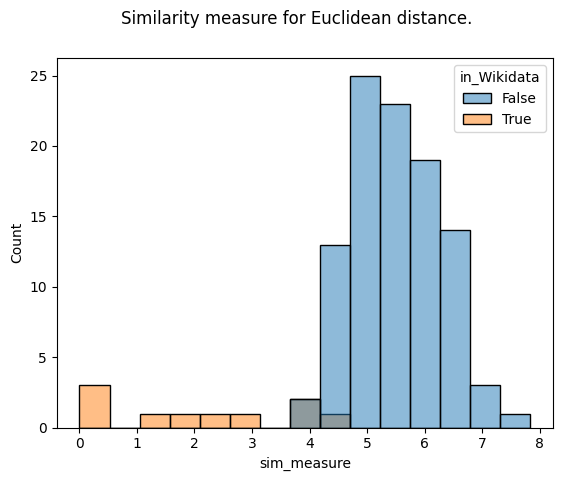

In [12]:
fig, axs = plt.subplots(1,1)
plt.suptitle("Similarity measure for Euclidean distance.")
sn.histplot(data=df, x="sim_measure", hue="in_Wikidata")
plt.savefig(root / "results" / "v2_euc_performance_renewed.png")